In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pyplot

In [2]:
class gauss_density_estimator:
    def __init__(self,n_dims):
        self.mu = np.zeros((1,n_dims))
        self.n_dims = n_dims
        self.sigma_sq = np.ones(n_dims)
        
    def train(self, train_data):
        self.mu = np.mean(train_data, axis = 0)
        self.sigma_sq =  np.sum((train_data - self.mu) ** 2.0, axis = 0) / train_data.shape[0]
        
    def compute_predictions(self, test_data):
        c = -self.n_dims * np.log(2*np.pi)/2.0 - np.log(np.prod(self.sigma_sq))/2.0
        log_prob = c - np.sum((test_data -  self.mu)**2.0/ (2.0 * self.sigma_sq),axis=1)
        
        return log_prob

In [128]:
class parzen_estimator:
    def __init__(self,n_dims,h):
        self.n_dims = n_dims
        self.h = h
    def train(self, train_data):
        self.train_data = train_data
        
    def compute_predictions(self,x):
        #if self.n_dims == 1:
            #pdf = (1.0/self.train_data.shape[0])*(1/(np.power(np.sqrt(2*np.pi)*self.h,self.n_dims)))*np.sum(np.exp((-1)*np.power((x-self.train_data),2.)/(2*self.h**2)))
        #elif self.n_dims > 1:
        point = np.ones([self.train_data.shape[0],self.n_dims])
        #point[:,0] = x
        #point[:,1] = y
        point = x
        
        constant = (1.0/self.train_data.shape[0])*(1/(np.power(np.sqrt(2*np.pi)*self.h,self.n_dims))) #scalar
        if self.n_dims == 1:
            norm_diff = np.power(np.linalg.norm((point - self.train_data)[:,None],axis = 1),2.)
        else:
            norm_diff = np.power(np.linalg.norm((point - self.train_data),axis = 1),2.)
        prob = np.sum(constant*(np.exp((-1)*(norm_diff)/(2*self.h**2))))
        return prob

[[ 3.5  1.4]
 [ 3.   1.4]
 [ 3.2  1.3]
 [ 3.1  1.5]
 [ 3.6  1.4]
 [ 3.9  1.7]
 [ 3.4  1.4]
 [ 3.4  1.5]
 [ 2.9  1.4]
 [ 3.1  1.5]
 [ 3.7  1.5]
 [ 3.4  1.6]
 [ 3.   1.4]
 [ 3.   1.1]
 [ 4.   1.2]
 [ 4.4  1.5]
 [ 3.9  1.3]
 [ 3.5  1.4]
 [ 3.8  1.7]
 [ 3.8  1.5]
 [ 3.4  1.7]
 [ 3.7  1.5]
 [ 3.6  1. ]
 [ 3.3  1.7]
 [ 3.4  1.9]
 [ 3.   1.6]
 [ 3.4  1.6]
 [ 3.5  1.5]
 [ 3.4  1.4]
 [ 3.2  1.6]
 [ 3.1  1.6]
 [ 3.4  1.5]
 [ 4.1  1.5]
 [ 4.2  1.4]
 [ 3.1  1.5]
 [ 3.2  1.2]
 [ 3.5  1.3]
 [ 3.6  1.4]
 [ 3.   1.3]
 [ 3.4  1.5]
 [ 3.5  1.3]
 [ 2.3  1.3]
 [ 3.2  1.3]
 [ 3.5  1.6]
 [ 3.8  1.9]
 [ 3.   1.4]
 [ 3.8  1.6]
 [ 3.2  1.4]
 [ 3.7  1.5]
 [ 3.3  1.4]]
[ 0.140816  0.029556]
[ 3.428  1.462]


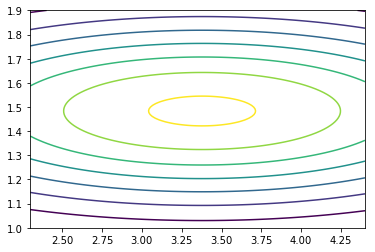

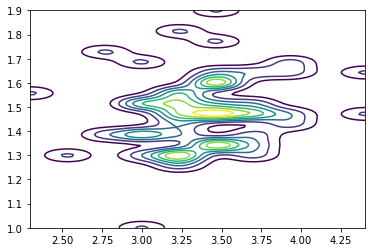

In [190]:
iris = np.loadtxt('iris.txt')
class1_2d = iris[:50,[1,2]]
x = np.linspace(np.min(class1_2d[:,0]), np.max(class1_2d[:,0]), num = 120)
y = np.linspace(np.min(class1_2d[:,1]), np.max(class1_2d[:,1]), num = 120)
Zgauss = np.zeros((x.shape[0],y.shape[0]))
gaussian_2d = gauss_density_estimator(2)
print class1_2d
gaussian_2d.train(class1_2d)
print  gaussian_2d.sigma_sq
print gaussian_2d.mu

for i, val1 in enumerate(x):
    for j,val2 in enumerate(y):
        Zgauss[i,j] = gaussian(np.array([val1,val2]), gaussian_2d.mu, gaussian_2d.sigma_sq)
        
pyplot.contour(x,y,Zgauss)
pyplot.show()

parzen_2d = parzen_estimator(2,.05)
parzen_2d.train(class1_2d)
Z= np.zeros([120,120])
for i,val1 in enumerate(x):
    for j,val2 in enumerate(y):
        Z[i,j] = parzen_2d.compute_predictions(np.array([val1,val2]))
        
pyplot.contour(x,y,Z)
pyplot.show()

(150L, 5L)


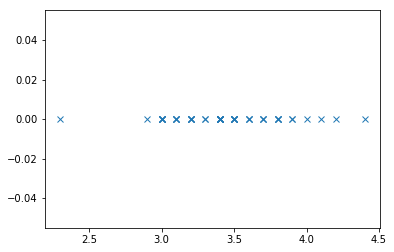

In [4]:
iris = np.loadtxt('iris.txt')
print iris.shape
class1 = iris[:50,:]
class1_1d = iris[:50,1]
pyplot.plot(class1_1d, np.zeros_like(class1_1d)+0, 'x')
pyplot.show()

(120L,)


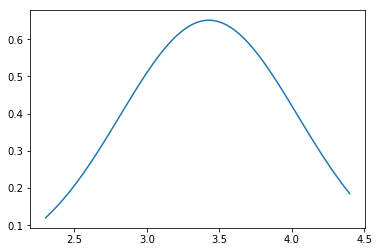

In [83]:
def gaussian(x, mu, sig_sq):
    if x.shape[0] != 2:
        return (1/np.sqrt(2*np.pi*sig_sq))*np.exp(-np.power(x - mu, 2.) / (2 * sig_sq))
    else:
        return np.product((1/(np.sqrt(2*np.pi)*np.power(sig_sq, x.shape[0]/2.0)))*(np.exp((-np.transpose(x - mu)*(x-mu)))) / (2 * sig_sq))
        

model = gauss_density_estimator(1)
model.train(class1_1d)

line = np.linspace(np.min(class1_1d), np.max(class1_1d), num=120)
print np.shape(line)
y = gaussian(line,model.mu, np.sqrt(model.sigma_sq))
pyplot.plot(line,y)


(120L,)
<type 'numpy.ndarray'>


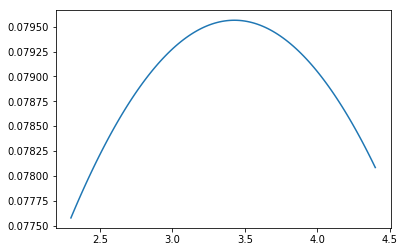

In [118]:
parzen = parzen_estimator(1,5)
parzen.train(class1_1d)
z=np.zeros(len(line))
print z.shape
for i,val in enumerate(line):
    
    z[i] = parzen.pdf(val)
print type(z)
pyplot.plot(line,z)

[ 0.140816  0.029556]
[ 3.428  1.462]


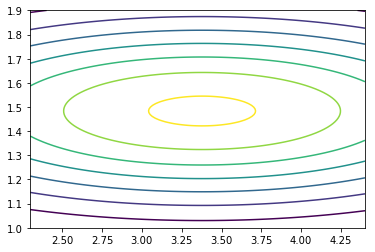

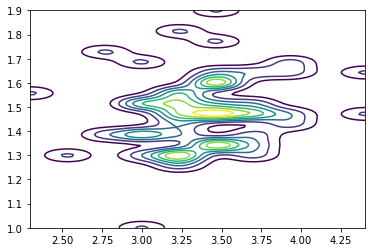

In [121]:
iris = np.loadtxt('iris.txt')
class1_2d = iris[:50,[1,2]]
x = np.linspace(np.min(class1_2d[:,0]), np.max(class1_2d[:,0]), num = 120)
y = np.linspace(np.min(class1_2d[:,1]), np.max(class1_2d[:,1]), num = 120)
Zgauss = np.zeros((x.shape[0],y.shape[0]))
gaussian_2d = gauss_density_estimator(2)
gaussian_2d.train(class1_2d)
print  gaussian_2d.sigma_sq
print gaussian_2d.mu

for i, val1 in enumerate(x):
    for j,val2 in enumerate(y):
        Zgauss[i,j] = gaussian(np.array([val1,val2]), gaussian_2d.mu, gaussian_2d.sigma_sq)
        
pyplot.contour(x,y,Zgauss)
pyplot.show()

parzen_2d = parzen_estimator(2,.05)
parzen_2d.train(class1_2d)
Z= np.zeros([120,120])
for i,val1 in enumerate(x):
    for j,val2 in enumerate(y):
        Z[i,j] = parzen_2d.pdf(np.array([val1,val2]))
        
pyplot.contour(x,y,Z)
pyplot.show()

In [ ]:
##Problem 4: Bayes Classifier

In [173]:
np.random.seed(123)
iris = np.loadtxt('iris.txt')
input_dims = [0,1,2,3]
split_ratio = 0.7
indices1 = np.arange(0,50)
indices2 = np.arange(50,100)
indices3 = np.arange(100,150)

np.random.shuffle(indices1)
np.random.shuffle(indices2)
np.random.shuffle(indices3)
print int(0.7*len(indices1))
split_index1 = int(split_ratio*len(indices1))
split_index2 = int(split_ratio*len(indices2))
split_index3 = int(split_ratio*len(indices3))

class1_train = iris[indices1[:split_index1]]
class1_test  = iris[indices1[split_index1:]]
class2_train = iris[indices2[:split_index2]]
class2_test  = iris[indices2[split_index2:]]
class3_train = iris[indices3[:split_index3]]
class3_test  = iris[indices3[split_index3:]]

gauss2d_class1 = gauss_density_estimator(2)
gauss2d_class2 = gauss_density_estimator(2)
gauss2d_class3 = gauss_density_estimator(2)

window2d_class1 = 

gauss2d_class1.train(class1_train[:,input_dims[:2]])
gauss2d_class2.train(class2_train[:,input_dims[:2]])
gauss2d_class3.train(class3_train[:,input_dims[:2]])

gauss4d_class1 = gauss_density_estimator(4)
gauss4d_class2 = gauss_density_estimator(4)
gauss4d_class3 = gauss_density_estimator(4)

gauss4d_class1.train(class1_train[:,input_dims[:4]])
gauss4d_class2.train(class2_train[:,input_dims[:4]])
gauss4d_class3.train(class3_train[:,input_dims[:4]])
print gauss2d_class1.mu

iris_train = np.concatenate([class1_train, class2_train, class3_train])
iris_test = np.concatenate([class1_test, class2_test, class3_test])

35
[ 5.04285714  3.43428571]


In [174]:
class classif_bayes:

    def __init__(self,modeles_mv, priors):
        self.modeles_mv = modeles_mv
        self.priors = priors
        if len(self.modeles_mv) != len(self.priors):
            print 'Le nombre de modeles MV doit etre egale au nombre de priors!'
        
        self.n_classes = len(self.modeles_mv)
                                                            
    # Retourne une matrice de taille nb. ex. de test x nombre de classes contenant les log
    # probabilités de chaque exemple de test sous chaque modèle MV. 
    def compute_predictions(self, test_data, eval_by_group=False):
        log_pred = np.empty((test_data.shape[0],self.n_classes))

        for i in range(self.n_classes):
            # ici il va falloir utiliser modeles_mv[i] et priors pour remplir
            # chaque colonne de log_pred (c'est plus efficace de faire tout une
            # colonne a la fois)
            
            log_pred[:,i] = self.modeles_mv[i].compute_predictions(test_data) +  np.log(self.priors[i])

        return log_pred

In [293]:
bayesgauss2d = classif_bayes([gauss2d_class1,gauss2d_class2,gauss2d_class3],[0.333,0.333,0.333])

In [294]:
# fonction plot
%pylab inline
import pylab
def gridplot(classifieur,train,test,n_points=50):

    train_test = np.vstack((train,test))
    (min_x1,max_x1) = (min(train_test[:,0]),max(train_test[:,0]))
    (min_x2,max_x2) = (min(train_test[:,1]),max(train_test[:,1]))

    xgrid = np.linspace(min_x1,max_x1,num=n_points)
    ygrid = np.linspace(min_x2,max_x2,num=n_points)

	# calcule le produit cartesien entre deux listes
    # et met les resultats dans un array
    thegrid = np.array(combine(xgrid,ygrid))

    les_comptes = classifieur.compute_predictions(thegrid)
    classesPred = np.argmax(les_comptes,axis=1)+1

    # La grille
    # Pour que la grille soit plus jolie
    #props = dict( alpha=0.3, edgecolors='none' )
    pylab.scatter(thegrid[:,0],thegrid[:,1],c = classesPred, s=50, edgecolor='black', linewidth='1', label='grid')
	# Les points d'entrainment
    pylab.scatter(train[:,0], train[:,1], c = train[:,-1], marker = 'v', s=50,edgecolor='black', linewidth='1', label = 'train')
    # Les points de test
    pylab.scatter(test[:,0], test[:,1], c = test[:,-1], marker = 's', s=50,edgecolor='black', linewidth='1', label = 'test')

    ## Un petit hack, parce que la fonctionalite manque a pylab...
    h1 = pylab.plot([min_x1], [min_x2], marker='o', c = 'w',ms=1) 
    h2 = pylab.plot([min_x1], [min_x2], marker='v', c = 'w',ms=1) 
    h3 = pylab.plot([min_x1], [min_x2], marker='s', c = 'w',ms=1) 
    #handles = [h1,h2,h3]
    ## fin du hack

    labels = ['grille','train','test']
    #pylab.legend(handles=[h1,h2,h3],labels=['grille','train','test'])
    pylab.legend(loc=2, fontsize='small')
    pylab.axis('equal')
    pylab.show()

def combine(*seqin):
    '''returns a list of all combinations of argument sequences.
for example: combine((1,2),(3,4)) returns
[[1, 3], [1, 4], [2, 3], [2, 4]]'''
    def rloop(seqin,listout,comb):
        '''recursive looping function'''
        if seqin:                       # any more sequences to process?
            for item in seqin[0]:
                newcomb=comb+[item]     # add next item to current comb
                # call rloop w/ rem seqs, newcomb
                rloop(seqin[1:],listout,newcomb)
        else:                           # processing last sequence
            listout.append(comb)        # comb finished, add to list
    listout=[]                      # listout initialization
    rloop(seqin,listout,[])         # start recursive process
    return listout

Populating the interactive namespace from numpy and matplotlib


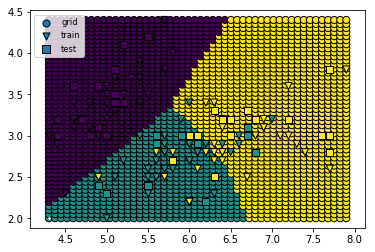

In [295]:
gridplot(bayesgauss2d, iris_train[:, input_dims + [-1]], iris_test[:, input_dims + [-1]], n_points=50)

In [290]:
#Error Rates
print iris_train.shape
log_prob_train=bayesgauss2d.compute_predictions(iris_train[:, input_dims[:2]])
log_prob_test=bayesgauss2d.compute_predictions(iris_test[:, input_dims[:2]])

classesPred_train = log_prob_train.argmax(1)+1
classesPred_test = log_prob_test.argmax(1)+1

print "Taux d'erreur (entrainement) %.2f%%" % ((1-(classesPred_train==iris_train[:,-1]).mean())*100.0)
print "Taux d'erreur (test) %.2f%%" % ((1-(classesPred_test==iris_test[:,-1]).mean())*100.0)

(105L, 5L)
Taux d'erreur (entrainement) 20.00%
Taux d'erreur (test) 20.00%


In [296]:
bayesgauss4d  = classif_bayes([gauss4d_class1,gauss4d_class2,gauss4d_class3],[0.333,0.333,0.333])

In [297]:
print iris_train.shape
log_prob_train=bayesgauss4d.compute_predictions(iris_train[:, input_dims[:4]])
log_prob_test=bayesgauss4d.compute_predictions(iris_test[:, input_dims[:4]])

classesPred_train = log_prob_train.argmax(1)+1
classesPred_test = log_prob_test.argmax(1)+1

print "Taux d'erreur (entrainement) %.2f%%" % ((1-(classesPred_train==iris_train[:,-1]).mean())*100.0)
print "Taux d'erreur (test) %.2f%%" % ((1-(classesPred_test==iris_test[:,-1]).mean())*100.0)

(105L, 5L)
Taux d'erreur (entrainement) 4.76%
Taux d'erreur (test) 2.22%


In [ ]:
parzen_estimator2d_class1 = 

bayesparzen2d = classif_bayes()